In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_csv('datasets/HydroWASTE_v10/HydroWASTE_v10.csv',encoding='latin-1')

In [51]:
df.head()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874.0,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585.0,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105.0,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.210,...,1,Secondary,1,2061.969,20247446.0,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330.0,0.405,0,0,1490.0,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58502 entries, 0 to 58501
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WASTE_ID    58502 non-null  int64  
 1   SOURCE      58502 non-null  int64  
 2   ORG_ID      58502 non-null  int64  
 3   WWTP_NAME   53215 non-null  object 
 4   COUNTRY     58502 non-null  object 
 5   CNTRY_ISO   58502 non-null  object 
 6   LAT_WWTP    58502 non-null  float64
 7   LON_WWTP    58502 non-null  float64
 8   QUAL_LOC    58502 non-null  int64  
 9   LAT_OUT     58502 non-null  float64
 10  LON_OUT     58502 non-null  float64
 11  STATUS      58502 non-null  object 
 12  POP_SERVED  58502 non-null  int64  
 13  QUAL_POP    58502 non-null  int64  
 14  WASTE_DIS   58502 non-null  float64
 15  QUAL_WASTE  58502 non-null  int64  
 16  LEVEL       58502 non-null  object 
 17  QUAL_LEVEL  58502 non-null  int64  
 18  DF          47302 non-null  float64
 19  HYRIV_ID    58123 non-nul

In [53]:
df.describe()

,WASTE_ID,SOURCE,ORG_ID,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,LON_OUT,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,58502.000000,58502.000000,5.850200e+04,58502.000000,58502.000000,58502.000000,58502.000000,58502.000000,5.850200e+04,58502.000000,5.850200e+04,58502.000000,58502.000000,4.730200e+04,5.812300e+04,47951.000000,58502.000000,58502.000000,4.266700e+04,58502.00000
mean,29251.500000,3.254162,7.594240e+09,35.131096,-14.641072,2.032802,35.128171,-14.639667,3.927373e+04,1.986855,8.916556e+03,2.222762,1.191224,2.792849e+05,4.191372e+07,391.842894,0.178541,0.331801,2.398177e+04,1.95619
std,16888.217061,3.386116,1.502416e+10,22.443167,67.525991,0.637807,22.443336,67.525516,1.536832e+05,0.953141,4.468567e+04,1.453383,0.393269,7.460834e+06,2.329755e+07,5173.557130,0.382971,0.470864,1.215321e+05,0.75870
min,1.000000,1.000000,1.000000e+00,-54.788000,-175.302000,1.000000,-54.798000,-175.302000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,1.000000e+00,1.000001e+07,0.001000,0.000000,0.000000,0.000000e+00,1.00000
25%,14626.250000,1.000000,4.000250e+03,33.485500,-81.639500,2.000000,33.479000,-81.631000,1.388000e+03,1.000000,3.406870e+02,1.000000,1.000000,1.058800e+02,2.040919e+07,1.718000,0.000000,0.000000,1.022058e+03,1.00000
50%,29251.500000,2.000000,1.296386e+06,41.720500,2.155000,2.000000,41.710000,2.158000,4.613500e+03,2.000000,1.078997e+03,1.000000,1.000000,5.696175e+02,4.018240e+07,6.544000,0.000000,0.000000,4.200000e+03,2.00000
75%,43876.750000,4.000000,1.000290e+09,48.460000,16.650750,2.000000,48.456000,16.676000,1.991100e+04,2.000000,4.428932e+03,4.000000,1.000000,3.784691e+03,7.049991e+07,37.966000,0.000000,1.000000,1.409900e+04,3.00000
max,58502.000000,12.000000,7.800000e+10,71.640000,178.482000,4.000000,71.644000,178.427000,1.014613e+07,4.000000,3.073754e+06,4.000000,2.000000,7.029366e+08,8.032324e+07,127105.248000,1.000000,1.000000,1.120625e+07,3.00000


In [54]:
df.columns

Index(['WASTE_ID', 'SOURCE', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM', 'COAST_50KM',
       'DESIGN_CAP', 'QUAL_CAP'],
      dtype='object')

In [55]:
dfn=df[['LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'WASTE_DIS', 'LEVEL', 'DF','RIVER_DIS',
       'DESIGN_CAP']]

In [56]:
dfn['STATUS'].value_counts()

STATUS
Not Reported              53033
Operational                3767
Closed                     1164
Projected                   193
Under Construction          140
Proposed                     81
Non-Operational              76
Decommissioned               28
Construction Completed       20
Name: count, dtype: int64

In [57]:
dfnew = dfn[(dfn['STATUS'] == 'Operational') | (dfn['STATUS'] == 'Not Reported')]

In [58]:
dfnew.shape

(56800, 12)

In [59]:
dfn['QUAL_LOC'].value_counts()

QUAL_LOC
2    44991
1     7521
4     3450
3     2540
Name: count, dtype: int64

In [60]:
dfnew = dfn[(dfn['QUAL_LOC'] == 1) | (dfn['QUAL_LOC'] == 2)]

In [61]:
dfnew.shape

(52512, 12)

In [62]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52512 entries, 0 to 58501
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAT_WWTP    52512 non-null  float64
 1   LON_WWTP    52512 non-null  float64
 2   QUAL_LOC    52512 non-null  int64  
 3   LAT_OUT     52512 non-null  float64
 4   LON_OUT     52512 non-null  float64
 5   STATUS      52512 non-null  object 
 6   POP_SERVED  52512 non-null  int64  
 7   WASTE_DIS   52512 non-null  float64
 8   LEVEL       52512 non-null  object 
 9   DF          42200 non-null  float64
 10  RIVER_DIS   42805 non-null  float64
 11  DESIGN_CAP  40127 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 5.2+ MB


In [63]:
dfnew.drop('QUAL_LOC', axis=1, inplace=True)

In [64]:
dfnew.isnull().sum()/(len(dfnew))*100

LAT_WWTP       0.000000
LON_WWTP       0.000000
LAT_OUT        0.000000
LON_OUT        0.000000
STATUS         0.000000
POP_SERVED     0.000000
WASTE_DIS      0.000000
LEVEL          0.000000
DF            19.637416
RIVER_DIS     18.485299
DESIGN_CAP    23.585085
dtype: float64

In [65]:
dfnew = dfnew.dropna(subset=['DF', 'RIVER_DIS','DESIGN_CAP'])

In [66]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33586 entries, 0 to 52713
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LAT_WWTP    33586 non-null  float64
 1   LON_WWTP    33586 non-null  float64
 2   LAT_OUT     33586 non-null  float64
 3   LON_OUT     33586 non-null  float64
 4   STATUS      33586 non-null  object 
 5   POP_SERVED  33586 non-null  int64  
 6   WASTE_DIS   33586 non-null  float64
 7   LEVEL       33586 non-null  object 
 8   DF          33586 non-null  float64
 9   RIVER_DIS   33586 non-null  float64
 10  DESIGN_CAP  33586 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.1+ MB


In [67]:
rtbc=['LAT_WWTP','LON_WWTP','LAT_OUT','LON_OUT','DF','RIVER_DIS']
dfnew[rtbc] = dfnew[rtbc].astype(int)

In [68]:
scaler = MinMaxScaler()
dfnew[['WASTE_DIS', 'DESIGN_CAP']] = scaler.fit_transform(dfnew[['WASTE_DIS', 'DESIGN_CAP']])
dfnew['EFFICIENCY'] = dfnew['WASTE_DIS'] / dfnew['DESIGN_CAP']

In [69]:
dfnew.replace([np.inf, -np.inf], np.nan).isnull().sum()

LAT_WWTP        0
LON_WWTP        0
LAT_OUT         0
LON_OUT         0
STATUS          0
POP_SERVED      0
WASTE_DIS       0
LEVEL           0
DF              0
RIVER_DIS       0
DESIGN_CAP      0
EFFICIENCY    126
dtype: int64

In [70]:
dfnew.replace([np.inf, -np.inf], np.nan, inplace=True)
dfnew.dropna(inplace=True) 

<Axes: xlabel='EFFICIENCY', ylabel='Density'>

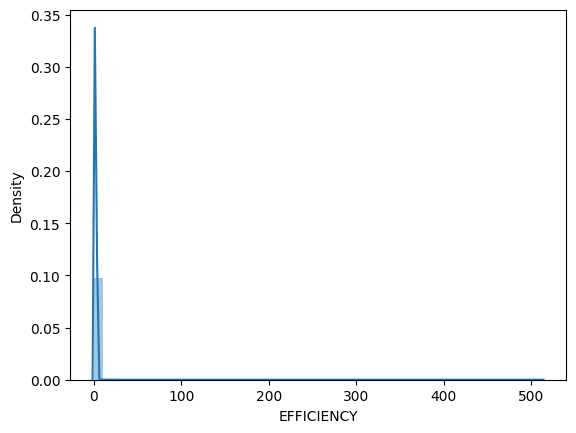

In [71]:
sns.distplot(dfnew['EFFICIENCY'])

In [72]:
from scipy.stats import skew
print(skew(dfnew['EFFICIENCY']))

98.69015418656699


In [73]:
q1,q3=np.percentile(dfnew['EFFICIENCY'],[25,75])
iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr

In [74]:
print(q1,q3,iqr)

0.4865283781731641 2.278619722936648 1.7920913447634836


In [75]:
dfnew.loc[(dfnew['EFFICIENCY'] > uw) | (dfnew['EFFICIENCY'] < lw)]

,LAT_WWTP,LON_WWTP,LAT_OUT,LON_OUT,STATUS,POP_SERVED,WASTE_DIS,LEVEL,DF,RIVER_DIS,DESIGN_CAP,EFFICIENCY
69,54,23,54,22,Not Reported,6200,0.034210,Advanced,2,1,0.001428,23.960292
772,48,18,48,18,Not Reported,4042,0.000269,Secondary,773,7,0.000045,6.031639
2106,50,15,50,15,Not Reported,41096,0.001906,Secondary,89,6,0.000040,47.473332
2266,51,22,51,22,Not Reported,19946,0.000925,Secondary,1203,39,0.000153,6.063483
2435,51,14,51,14,Not Reported,2424,0.000112,Secondary,142,0,0.000022,5.040241
...,...,...,...,...,...,...,...,...,...,...,...,...
37889,33,-94,33,-94,Not Reported,8430,0.001339,Advanced,43,2,0.000210,6.371349
38035,29,-95,29,-95,Not Reported,1250,0.000266,Advanced,649,6,0.000051,5.249929
38707,47,-117,47,-117,Not Reported,123,0.000032,Secondary,536,0,0.000006,5.266007
39318,43,-90,43,-90,Not Reported,4783,0.000702,Secondary,582,14,0.000081,8.658757


In [76]:
ndf = dfnew.loc[(dfnew['EFFICIENCY'] <= uw) & (dfnew['EFFICIENCY'] >= lw)]
print('before removing outliers:', len(dfnew))
print('after removing outliers:',len(ndf))
print('outliers:', len(dfnew)-len(ndf))

before removing outliers: 33460
after removing outliers: 33325
outliers: 135


<Axes: xlabel='EFFICIENCY', ylabel='Density'>

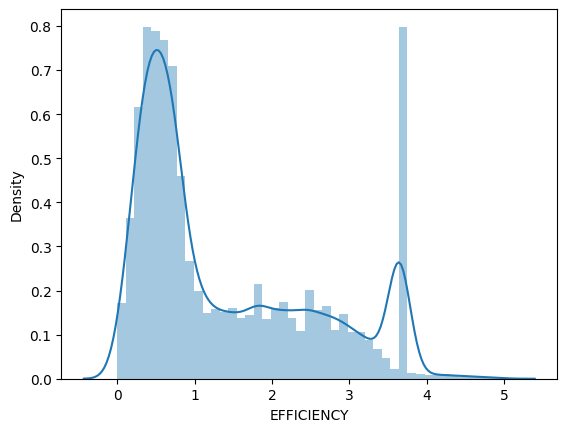

In [77]:
sns.distplot(ndf['EFFICIENCY'])

<Axes: ylabel='EFFICIENCY'>

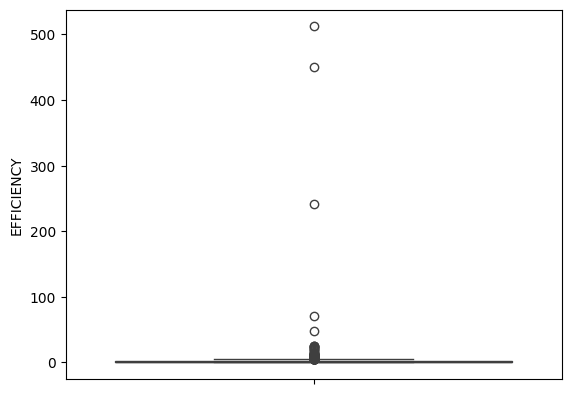

In [78]:
sns.boxplot(dfnew['EFFICIENCY'])

<Axes: ylabel='EFFICIENCY'>

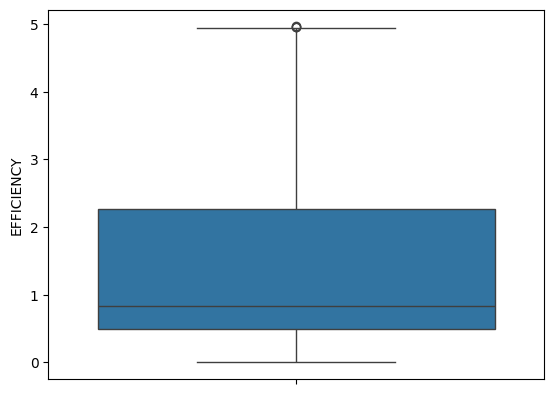

In [79]:
sns.boxplot(ndf['EFFICIENCY'])

In [80]:
ndf.drop('STATUS',axis=1)

,LAT_WWTP,LON_WWTP,LAT_OUT,LON_OUT,POP_SERVED,WASTE_DIS,LEVEL,DF,RIVER_DIS,DESIGN_CAP,EFFICIENCY
0,56,22,56,22,1060,0.000048,Advanced,2421,4,0.000410,0.117466
1,54,24,54,24,87900,0.002862,Advanced,2534,257,0.019632,0.145797
2,55,25,55,25,12400,0.000637,Advanced,1367,30,0.002945,0.216458
3,55,23,55,23,2500,0.000188,Secondary,2061,13,0.000389,0.484051
4,55,23,55,23,1200,0.000055,Secondary,209,0,0.000133,0.410542
...,...,...,...,...,...,...,...,...,...,...,...
52709,22,88,22,88,73493,0.003579,Secondary,4717,600,0.000982,3.645785
52710,22,88,22,88,40087,0.001952,Primary,8647,600,0.000535,3.645784
52711,24,88,24,88,24720,0.001204,Primary,2022,86,0.000330,3.645783
52712,22,88,22,88,300654,0.014640,Secondary,1212,631,0.004016,3.645786


In [81]:
ndf = ndf.reset_index(drop=True)

In [82]:
df_encoded = pd.get_dummies(ndf, columns=['LEVEL'], prefix='LEVEL', drop_first=True)

In [83]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33325 entries, 0 to 33324
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LAT_WWTP         33325 non-null  int64  
 1   LON_WWTP         33325 non-null  int64  
 2   LAT_OUT          33325 non-null  int64  
 3   LON_OUT          33325 non-null  int64  
 4   STATUS           33325 non-null  object 
 5   POP_SERVED       33325 non-null  int64  
 6   WASTE_DIS        33325 non-null  float64
 7   DF               33325 non-null  int64  
 8   RIVER_DIS        33325 non-null  int64  
 9   DESIGN_CAP       33325 non-null  float64
 10  EFFICIENCY       33325 non-null  float64
 11  LEVEL_Primary    33325 non-null  bool   
 12  LEVEL_Secondary  33325 non-null  bool   
dtypes: bool(2), float64(3), int64(7), object(1)
memory usage: 2.9+ MB


In [84]:
x=df_encoded[['LAT_WWTP','LON_WWTP','LAT_OUT','LON_OUT','POP_SERVED','DF','RIVER_DIS','DESIGN_CAP','LEVEL_Primary','LEVEL_Secondary']]
y=df_encoded[['EFFICIENCY']]

In [85]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.ensemble import RandomForestRegressor  
model = RandomForestRegressor(n_estimators=100, random_state=42)  
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [87]:
y_pred = model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.24680180002509408
MSE: 0.1616058159622958
R² Score: 0.8779856564470316


In [88]:
cv_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='r2')
print("Cross-validated R² (Validation):", cv_scores.mean())

Cross-validated R² (Validation): 0.8311879670606354
